In [17]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import binary_crossentropy
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

import matplotlib.pyplot as plt
import math

In [18]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.applications import DenseNet201
import tensorflow as tf
tf.keras.applications.DenseNet201(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000
)

import matplotlib.pyplot as plt
import math

base_dir = '/Users/jye98/Desktop/datasets4/'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'test')

train_datagen = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True,
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

validation_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)



Found 1718 images belonging to 2 classes.
Found 1718 images belonging to 2 classes.


In [19]:
densenet_base = DenseNet201(weights='imagenet',
                            include_top = False,
                            input_shape = (150, 150, 3))

In [20]:
densenet_base.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_10 (ZeroPadding  (None, 156, 156, 3)  0          ['input_6[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 75, 75, 64)   9408        ['zero_padding2d_10[0][0]']      
                                                                                        

In [21]:
model = models.Sequential()
model.add(densenet_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
for layer in densenet_base.layers:
    layer.trainable = False

for layer in densenet_base.layers[15:]:
    layer.trainable = True

In [23]:
opt = Adam(learning_rate=3e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
loss = binary_crossentropy
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

In [24]:
train_step = math.ceil(train_generator.n/32)
valid_step = math.ceil(validation_generator.n/32)

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_step,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = valid_step
)

/var/folders/qz/7jppp28900j0kj82xh2k9nxm0000gn/T/ipykernel_26182/4030321721.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30


2022-05-16 18:41:40.166287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - ETA: 0s - loss: 0.6658 - accuracy: 0.6816

2022-05-16 18:43:02.715034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 143s 2s/step - loss: 0.6658 - accuracy: 0.6816 - val_loss: 0.4591 - val_accuracy: 0.7829
Epoch 2/30
54/54 [==============================] - 98s 2s/step - loss: 0.4896 - accuracy: 0.7643 - val_loss: 0.4259 - val_accuracy: 0.7992
Epoch 3/30
54/54 [==============================] - 97s 2s/step - loss: 0.4243 - accuracy: 0.7980 - val_loss: 0.3654 - val_accuracy: 0.8324
Epoch 4/30
54/54 [==============================] - 97s 2s/step - loss: 0.4210 - accuracy: 0.8201 - val_loss: 1.7046 - val_accuracy: 0.6607
Epoch 5/30
54/54 [==============================] - 95s 2s/step - loss: 0.3805 - accuracy: 0.8329 - val_loss: 0.6018 - val_accuracy: 0.8003
Epoch 6/30
54/54 [==============================] - 95s 2s/step - loss: 0.3321 - accuracy: 0.8591 - val_loss: 0.2497 - val_accuracy: 0.8882
Epoch 7/30
54/54 [==============================] - 96s 2s/step - loss: 0.2894 - accuracy: 0.8754 - val_loss: 0.2686 - val_accuracy: 0.8882
Epoch 8/30
54/54 [============

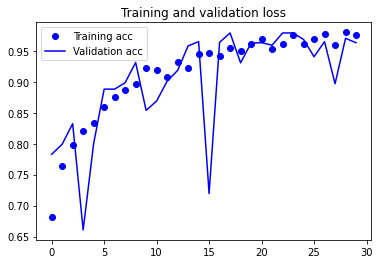

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
#model.save('CNN_epoch_20.h5')

test_dir = os.path.join(base_dir,'test')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'

)

test_step = math.ceil(test_generator.n/32)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_step, workers=4)
print(f'test loss = {test_loss:.4f} / test acc : {test_acc*100:.2f} %')

Found 1718 images belonging to 2 classes.


/var/folders/qz/7jppp28900j0kj82xh2k9nxm0000gn/T/ipykernel_26182/3966096403.py:15: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_step, workers=4)


test loss = 0.1130 / test acc : 96.33 %
